In [14]:
%pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/3b/47b5eaee01ef2b5a80ba3f7f6ecf79587cb458690857d4777bfd77371c6f/scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.0/8.9 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.1/8.9 MB 751.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/8.9 MB 751.6 


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
%pip install scikit-learn opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [7]:
image_path = "C:/Users/Vansh/OneDrive/Desktop/football_analysis/output_videos/cropped_image.jpg"
image=cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


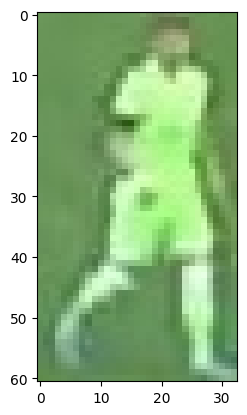

In [8]:
plt.imshow(image)
plt.show()

taking top half of he image


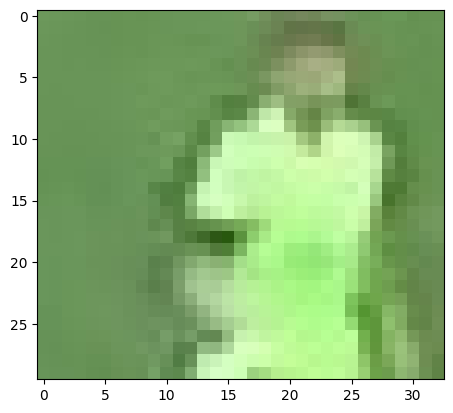

In [9]:
top_half_image = image[:image.shape[0]//2, :, :]
plt.imshow(top_half_image)
plt.show()

Cluster the image into two clusters


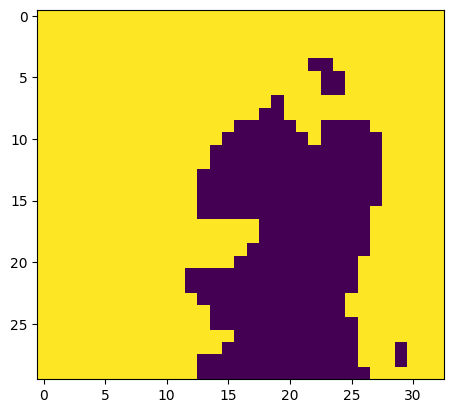

In [18]:
image_2d=top_half_image.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
labels = kmeans.labels_

# Reshape labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
plt.imshow(clustered_image)
plt.show()

In [19]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster= max(set(corner_cluster), key=corner_cluster.count)

print("Non-player cluster:", non_player_cluster)

Non-player cluster: 1


In [20]:
player_cluster= 1 - non_player_cluster
print("Player cluster:", player_cluster)

Player cluster: 0


In [21]:
kmeans.cluster_centers_[player_cluster]

array([184.91791045, 239.19402985, 154.11567164])